In [1]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
# Menentukan jalur direktori data pelatihan dan validasi
dataset_dir = './NewDataset_AlreadySplit/'
train_dir = './NewDataset_AlreadySplit/Train/'
test_dir = './NewDataset_AlreadySplit/Test/'

In [3]:
def find_largest_image_size_with_filename(folder_path):
    max_width = 0
    max_height = 0
    largest_filename = ""

    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        width, height = image.size

        if width > max_width:
            max_width = width
            largest_filename = filename
        if height > max_height:
            max_height = height
            largest_filename = filename

    return max_width, max_height, largest_filename

In [4]:
train_path = os.path.join(dataset_dir, 'Train')
test_path = os.path.join(dataset_dir, 'Test')

train_max_width = 0
train_max_height = 0
train_largest_filename = ""
test_max_width = 0
test_max_height = 0
test_largest_filename = ""

for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    max_width, max_height, largest_filename = find_largest_image_size_with_filename(folder_path)
    if max_width > train_max_width:
        train_max_width = max_width
        train_largest_filename = largest_filename
    if max_height > train_max_height:
        train_max_height = max_height
        train_largest_filename = largest_filename

for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    max_width, max_height, largest_filename = find_largest_image_size_with_filename(folder_path)
    if max_width > test_max_width:
        test_max_width = max_width
        test_largest_filename = largest_filename
    if max_height > test_max_height:
        test_max_height = max_height
        test_largest_filename = largest_filename

print("File dengan ukuran terbesar pada folder train:")
print("Nama File:", train_largest_filename)
print("Lebar:", train_max_width)
print("Tinggi:", train_max_height)

print("File dengan ukuran terbesar pada folder test:")
print("Nama File:", test_largest_filename)
print("Lebar:", test_max_width)
print("Tinggi:", test_max_height)

File dengan ukuran terbesar pada folder train:
Nama File: 58.jpg
Lebar: 4608
Tinggi: 5184
File dengan ukuran terbesar pada folder test:
Nama File: 18.jpg
Lebar: 4032
Tinggi: 5184


In [5]:
# Menentukan dimensi citra input dan jumlah kelas
image_height = 1000
image_width = 1000
num_classes = 4

In [6]:
# Membangun model CNN
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [7]:
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Menggunakan ImageDataGenerator untuk memuat dan mempersiapkan data citra
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Menentukan batch size dan jumlah total sampel pada setiap dataset
batch_size = 32
total_train = len(train_dir)
total_validation = len(test_dir)

In [11]:
# Menggunakan data generator untuk memuat dan mempersiapkan data citra
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='sparse')

Found 1351 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [12]:
# Melatih model menggunakan generator data
history = model.fit(
      train_generator,
      steps_per_epoch=total_train // batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=total_validation // batch_size)

Epoch 1/30


c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 230s 230s/step - loss: 1.3578 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 234s 234s/step - loss: 154.9071 - accuracy: 0.4062
Epoch 3/30
1/1 [==============================] - 235s 235s/step - loss: 133.1826 - accuracy: 0.2188
Epoch 4/30
1/1 [==============================] - 229s 229s/step - loss: 48.0988 - accuracy: 0.2188
Epoch 5/30
1/1 [==============================] - 186s 186s/step - loss: 13.3754 - accuracy: 0.2188
Epoch 6/30
1/1 [==============================] - 252s 252s/step - loss: 2.0018 - accuracy: 0.4688
Epoch 7/30
1/1 [==============================] - 266s 266s/step - loss: 1.6273 - accuracy: 0.5938
Epoch 8/30
1/1 [==============================] - 238s 238s/step - loss: 3.0575 - accuracy: 0.2188
Epoch 9/30


In [38]:
# Evaluasi model   
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

11/11 - 22s - loss: 1.3407 - accuracy: 0.3912 - 22s/epoch - 2s/step

Test accuracy: 0.3911764621734619


In [39]:
import matplotlib.pyplot as plt

KeyError: 'val_accuracy'

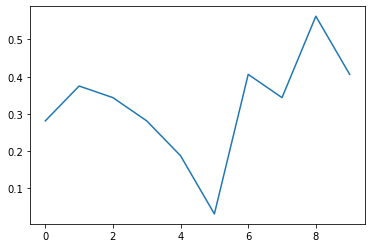

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Menampilkan grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()